

## Notebook for extreme drought calculation 

Data: SPEI 12 for South Sudan, with SPEI <-2

In [1]:
import sys, os
import geopandas as gpd
import rasterio as rio
import numpy as np
from rasterstats import zonal_stats
from rasterio.plot import show
import pandas as pd
from glob import glob

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from rasterio.plot import plotting_extent

In [3]:
out_dir = r"D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\Theme3\Drought_OutputAndresWorkbook"
out_spei = r"E:\TempWorking\SSD_Water\Drought\SPEI"

In [4]:
adm2 = gpd.read_file(r"D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\RawData\AdminBoundaries\SS_ADM2.shp")

In [5]:
spei_files = os.listdir(out_spei)

In [6]:
spei_files = [os.path.join(out_spei, f) for f in spei_files]

In [7]:
spei_files[0:5]

['E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1958-12-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1959-01-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1959-02-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1959-03-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1959-04-01.tif']

### TUTORIAL: Loading raster and zonal stats

In [8]:
file = spei_files[0]

In [9]:
spei_rio = rio.open(file)

In [10]:
# still just a rasterio object, haven't read any data
type(spei_rio)

rasterio.io.DatasetReader

In [11]:
spei_rio.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 269,
 'height': 211,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.041666666666666664, 0.0, 24.125,
        0.0, -0.041666666666666664, 12.25)}

See that no data is encoded as numpy nan (not a number) which is equivalent to infinity

In [12]:
#read frist band from rasterio object, result is a numpy array
data = spei_rio.read(1)

In [13]:
type(data)

numpy.ndarray

In [14]:
data.shape
#rows and columns

(211, 269)

In [15]:
data.max()

nan

In [16]:
np.nanmax(data)

2.1608233

In [17]:
np.nanmin(data)

-0.011809923

In [18]:
data.shape

(211, 269)

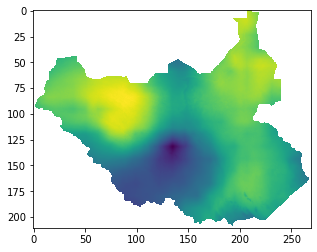

<AxesSubplot:>

In [19]:
show(data)

Documentation for zonal stats:  
https://pythonhosted.org/rasterstats/manual.html

In [20]:
adm2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
spei_rio.crs

CRS.from_epsg(4326)

In [22]:
zs = zonal_stats(adm2, data, affine=spei_rio.transform, stats='mean', nodata=spei_rio.nodata)

In [23]:
pd.DataFrame(zs)

,mean
0,1.222566
1,1.218728
2,1.119216
3,1.179333
4,0.963048
...,...
73,0.460215
74,1.091493
75,0.558151
76,0.844315


reclass

In [24]:
data[data >= -2] = 0 # no drought
data[data < -2] = 1 # drought

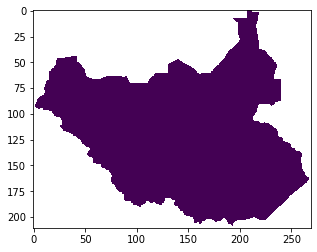

<AxesSubplot:>

In [25]:
show(data)

In [26]:
data[np.isnan(data)]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

## Drought analysis

We define drought frequency as the number of months in which the SPEI < −1.5, which corresponds to the lower limit of a severe drought based on the U.S. Drought Monitor classification scheme  

Please calculate the drought frequency for each decade (i.e., for each pixel i and decade d count the number of times n where the pixel value is  SPEI < −1.5, so that drought frequency is n/120, where 120 is the number of months in the decade)  

Compare drought frequency in 2000s and 2010s to the ‘baseline’ defined as drought frequency in 1950-1960. This can be done by calculate the % change in drought frequency for each pixel.


In [27]:
glob(out_spei+'/wld_cli_spei_gamma_12_terraclimate_196*')

['E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-01-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-02-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-03-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-04-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-05-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-06-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-07-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-08-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-09-01.tif',
 'E:\\TempWorking\\SSD_Water\\Drought\\SPEI\\wld_cli_spei_gamma_12_terraclimate_1960-10-01.tif',
 'E:\\TempWorking\\SSD_Water\\

Try one decade

In [28]:
decade_files = glob(out_spei+'/wld_cli_spei_gamma_12_terraclimate_19**')

In [29]:
# for file in decade_files:
#     date = file[-14:-4]

In [30]:
len(decade_files)

493

store all boolean results in a list, then convert to three dim numpy array

In [31]:
res = []
for file in decade_files:
    spei_rio = rio.open(file)
    data = spei_rio.read(1)
    data[data >= -2] = 0 # no drought
    data[data < -2] = 1 # drought
#     print(np.nanmax(data))
#     data[np.isnan(data)] = -99 # change nodata value to save as integer
#     data = data.astype('int')
    res.append(data)

In [32]:
res_np = np.array(res)

In [33]:
# sum all values over the first axis
sum_dec = res_np.sum(axis=0)

In [34]:
np.nanmax(sum_dec)

15.0

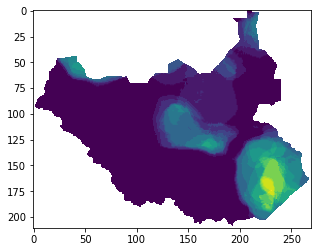

<AxesSubplot:>

In [35]:
show(sum_dec)

All decades

In [36]:
decades = ['196', '197', '198', '199', '200', '201']

In [37]:
decade_results = []

In [38]:
for decade in decades:
    decade_files = glob(out_spei + f'/wld_cli_spei_gamma_12_terraclimate_{decade}*')
    
    res = []
    for file in decade_files:
        spei_rio = rio.open(file)
        data = spei_rio.read(1)
        data[data >= -2] = 0 # no drought
        data[data < -2] = 1 # drought
        res.append(data)
    
    res_np = np.array(res)
    sum_decade = res_np.sum(axis=0)
    decade_results.append(sum_decade)

In [39]:
len(decade_results)

6

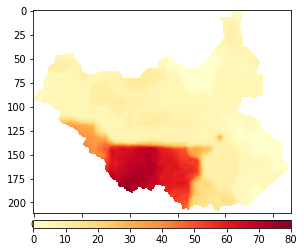

In [40]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
# show(decade_results[5], cmap="YlOrRd")
im = ax.imshow(decade_results[5], cmap='YlOrRd')
cb = fig.colorbar(im, cax=cax, orientation='horizontal')

In [41]:
[np.nanmax(d) for d in decade_results]

[0.0, 0.0, 13.0, 8.0, 12.0, 80.0]

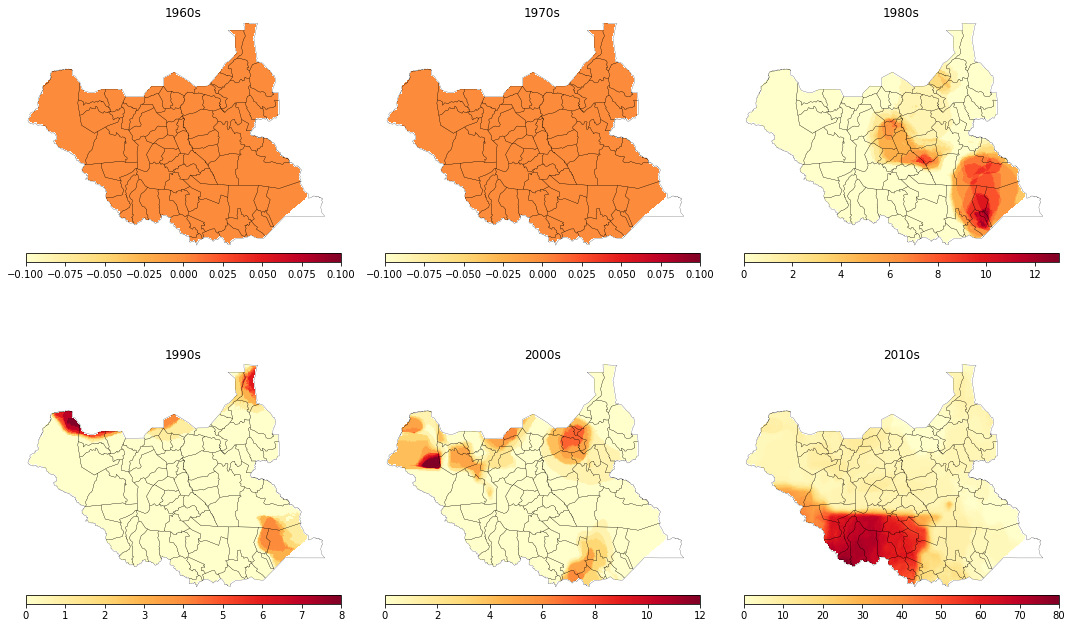

In [42]:
fig = plt.figure(figsize=(15, 10))
for i, data in enumerate(decade_results):
    decade = decades[i]+"0s"
    i = i+1
    ext = plotting_extent(spei_rio)
    ax = fig.add_subplot(2,3,i)
    ax.set_title(f"{decade}")
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size="4%", pad=0.1)
    im = ax.imshow(data, cmap='YlOrRd', extent=ext)
    adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
    cb = fig.colorbar(im, cax=cax, orientation='horizontal')
    
plt.tight_layout()

0 1960s
1 1970s
2 1980s
3 1990s
4 2000s
5 2010s


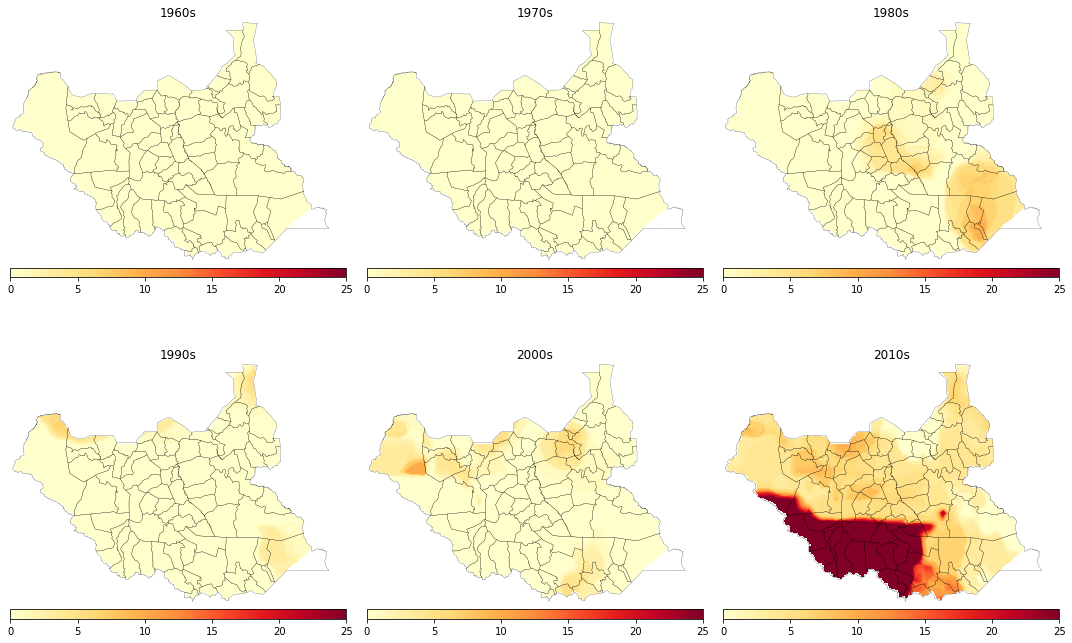

In [64]:
fig = plt.figure(figsize=(15, 10))
for i, data in enumerate(decade_results):
    decade = decades[i]+"0s"
    print(i, decade)
    i = i+1
    ext = plotting_extent(spei_rio)
    ax = fig.add_subplot(2,3,i)
    ax.set_title(f"{decade}")
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size="4%", pad=0.1)
    data = (data/120)*100 #normalize data with 100% = 120 months
    im = ax.imshow(data, cmap='YlOrRd', extent=ext, vmin=0, vmax=25) 
    adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
    cb = fig.colorbar(im, cax=cax, orientation='horizontal')
    
plt.tight_layout()

In [44]:
decade_results[1]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [45]:
zs_res = []

In [46]:
for decade, data in zip(decades, decade_results):
    zs = zonal_stats(adm2, data, affine=spei_rio.transform, stats='max', nodata=spei_rio.nodata)
    zs_df = pd.DataFrame(zs).rename(columns={'max':f'max_{decade}'})
    zs_res.append(zs_df)

In [47]:
zs_res = pd.concat(zs_res, axis=1)
zs_res = adm2.join(zs_res)

In [48]:
zs_res["max19savg"] = (zs_res["max_196"]+zs_res["max_197"]+zs_res["max_198"]+zs_res["max_199"])/4

In [49]:
zs_res.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,Area2,pop_no_ris,geometry,max_196,max_197,max_198,max_199,max_200,max_201,max19savg
0,6.425236,18611.507286,Juba,SS0101,None,None,None,Central Equatoria,SS01,South Sudan,...,18365.20,411950.646975,"POLYGON ((32.10224 5.36788, 32.09834 5.21346, ...",0.0,0.0,0.0,0.0,6.0,62.0,0.0
1,2.082643,2549.814924,Kajo-keji,SS0102,None,None,None,Central Equatoria,SS01,South Sudan,...,2515.96,262816.482042,"POLYGON ((31.61854 4.02379, 31.69394 3.95754, ...",0.0,0.0,0.0,0.0,6.0,18.0,0.0
2,3.402761,3545.715110,Lainya,SS0103,None,None,None,Central Equatoria,SS01,South Sudan,...,3501.75,116069.837670,"POLYGON ((31.18674 4.30480, 31.17532 4.25454, ...",0.0,0.0,0.0,0.0,3.0,60.0,0.0
3,2.069064,1326.493498,Morobo,SS0104,None,None,None,Central Equatoria,SS01,South Sudan,...,1309.79,134373.942852,"POLYGON ((31.04738 3.81817, 31.09567 3.74048, ...",0.0,0.0,0.0,0.0,2.0,51.0,0.0
4,5.221777,10813.630464,Terekeka,SS0105,None,Terkeka,None,Central Equatoria,SS01,South Sudan,...,10673.80,89903.651139,"POLYGON ((31.02171 5.90953, 31.69732 5.87275, ...",0.0,0.0,0.0,0.0,2.0,58.0,0.0


In [50]:
decade_results_19sAvg = (decade_results[0]+decade_results[1]+decade_results[2]+decade_results[3])/4

In [51]:
p_decade_results_19sAvg = (decade_results_19sAvg/120)*100

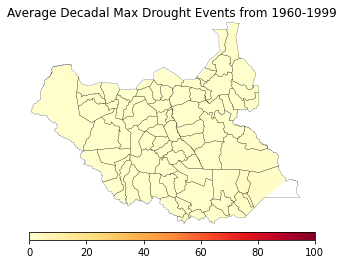

In [52]:
fig, ax = plt.subplots(1, 1)
plt.axis('off')
ax.set_title(f"Average Decadal Max Drought Events from 1960-1999")
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
im = ax.imshow(p_decade_results_19sAvg, cmap='YlOrRd', extent=ext, vmin=0, vmax=100)
adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
cb = fig.colorbar(im, cax=cax, orientation='horizontal')


In [53]:
p_decade_results_2000s = (decade_results[4]/120)*100

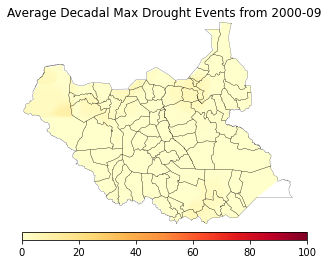

In [54]:
fig, ax = plt.subplots(1, 1)
plt.axis('off')
ax.set_title(f"Average Decadal Max Drought Events from 2000-09")
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
im = ax.imshow(p_decade_results_2000s, cmap='YlOrRd', extent=ext, vmin=0, vmax=100)
adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
cb = fig.colorbar(im, cax=cax, orientation='horizontal')

In [55]:
p_decade_results_2010s = (decade_results[5]/120)*100

#### Export 2010s data

In [67]:
with rio.open(r'D:\OneDrive\Work\WorldBank\Assignments\20211104_SSudanWaterSecurity\Data\Theme4\SSD_Drought_Data\Drough2010s_num2minusEvents.tif', 'w',
             driver= spei_rio.driver,
             height = spei_rio.height,
             width = spei_rio.width,
             count = spei_rio.count,
             crs = spei_rio.crs,
             transform = spei_rio.transform,
             dtype = 'float32'
)as dst:
    dst.write(p_decade_results_2010s,1)

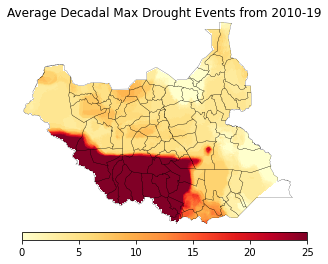

In [65]:
fig, ax = plt.subplots(1, 1)
plt.axis('off')
ax.set_title(f"Average Decadal Max Drought Events from 2010-19")
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
im = ax.imshow(p_decade_results_2010s, cmap='YlOrRd', extent=ext, vmin=0, vmax=25)
adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
cb = fig.colorbar(im, cax=cax, orientation='horizontal')

In [57]:
noNan_decade_results  = np.nan_to_num(decade_results_19sAvg, nan = 0)
noNan0_decade_results = noNan_decade_results+0.00000001
decade_results2000s_adj = decade_results[4] +0.00000001
decade_results2010s_adj = decade_results[5] +0.00000001

In [58]:
decade_results_2000sPchange = (((noNan0_decade_results-decade_results2000s_adj)/noNan0_decade_results)*-100)

In [59]:
decade_results_2010sPchange = (((noNan0_decade_results-decade_results2010s_adj)/noNan0_decade_results)*-100)

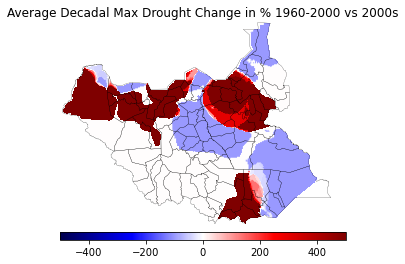

In [60]:
fig, ax = plt.subplots(1, 1)
plt.axis('off')
ax.set_title(f"Average Decadal Max Drought Change in % 1960-2000 vs 2000s")
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
im = ax.imshow(decade_results_2000sPchange, cmap='seismic', extent=ext, vmin=-500,vmax=500)
adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
cb = fig.colorbar(im, cax=cax, orientation='horizontal')


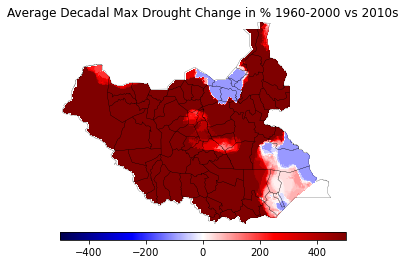

In [61]:
fig, ax = plt.subplots(1, 1)
plt.axis('off')
ax.set_title(f"Average Decadal Max Drought Change in % 1960-2000 vs 2010s")
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size="4%", pad=0.1)
im = ax.imshow(decade_results_2010sPchange, cmap='seismic', extent=ext, vmin=-500,vmax=500)
adm2.plot(ax = ax, facecolor="none", edgecolor='black', linewidth=0.2)
cb = fig.colorbar(im, cax=cax, orientation='horizontal')
